In [1]:
### General import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Read input file
df = pd.read_csv('opsd_austria_daily.csv', index_col=0)
df.index = pd.to_datetime(df.index)
df.sample(5)

,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual
utc_timestamp,,,,,,
2019-07-24 05:45:00+00:00,2019-07-24T07:45:00+0200,7783.2,7476.00,NaN,240.00,20.00
2016-10-21 03:15:00+00:00,2016-10-21T05:15:00+0200,6538.4,6850.75,30.40,0.00,17.65
2015-01-05 09:15:00+00:00,2015-01-05T10:15:00+0100,7524.4,8628.74,42.51,33.35,1356.95
2016-10-20 09:30:00+00:00,2016-10-20T11:30:00+0200,9198.4,9311.30,52.68,195.73,69.13
2015-04-19 09:30:00+00:00,2015-04-19T11:30:00+0200,6339.2,6577.90,8.00,433.60,54.46


In [8]:
df.columns.tolist()

['cet_cest_timestamp',
 'AT_load_actual_entsoe_transparency',
 'AT_load_forecast_entsoe_transparency',
 'AT_price_day_ahead',
 'AT_solar_generation_actual',
 'AT_wind_onshore_generation_actual']

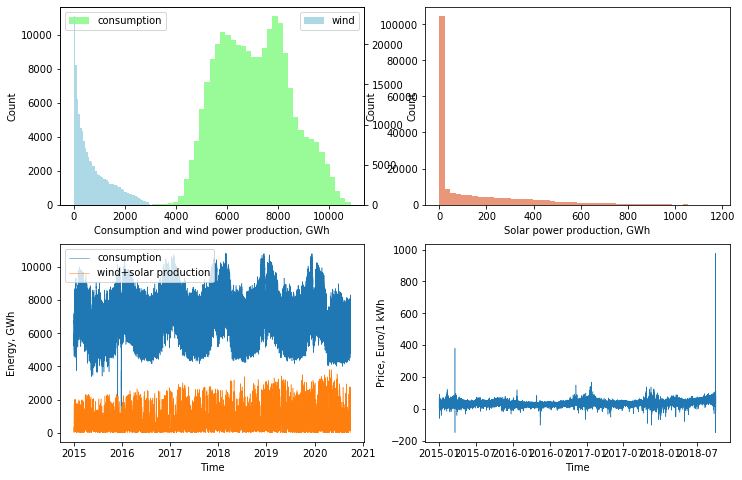

In [73]:
# Task 1a: visualize distribution & time changes of input data
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Distribution of electricity consumption & wind production
ax[0,0].hist(df['AT_load_actual_entsoe_transparency'], bins=50, color='palegreen', label='consumption') # put here electricity consumption values
ax[0,0].set_xlabel('Consumption and wind power production, GWh')
ax[0,0].set_ylabel('Count')

ax2 = ax[0,0].twinx() 
ax2.hist(df.AT_wind_onshore_generation_actual, bins=50, color='lightblue', label='wind') 
ax2.set_ylabel('Count')
ax[0,0].legend(loc='best')
ax2.legend(loc='best')

# Distribution of solar power production
ax[0,1].hist(df.AT_solar_generation_actual, bins=50, color='darksalmon') 
ax[0,1].set_xlabel('Solar power production, GWh')
ax[0,1].set_ylabel('Count')

# Time series
ax[1,0].plot(df.AT_load_actual_entsoe_transparency, linewidth = 0.5, label='consumption') 
ax[1,0].plot(df.loc[:, ['AT_solar_generation_actual', 'AT_wind_onshore_generation_actual']].sum(axis=1), linewidth = 0.5, label='wind+solar production') # put here merged wind + solar data values
ax[1,0].set_xlabel('Time')
ax[1,0].set_ylabel('Energy, GWh')
ax[1,0].legend(loc='best')

# Price distribution
ax[1,1].plot(df.AT_price_day_ahead, linewidth = 0.5) 
ax[1,1].set_xlabel('Time')
ax[1,1].set_ylabel('Price, Euro/1 kWh')
plt.show()

In [22]:
# Task 1b: analysing the seasonality for 2019 year
''' defining a rolling average '''

df['Electricity_consumption_RA'] = df['AT_load_actual_entsoe_transparency'].rolling(15).mean()
df['Wind_production_RA'] = df['AT_wind_onshore_generation_actual'].rolling(15).mean()
df['Solar_production_RA'] = df['AT_solar_generation_actual'].rolling(15).mean()

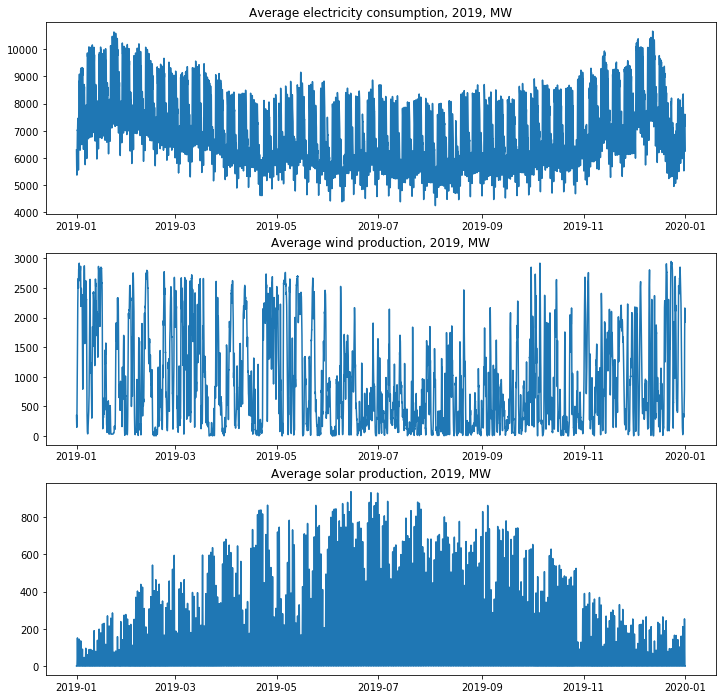

In [72]:
# Plot
plt.figure(figsize=(12, 12))

# Average electricity consumption
plt.subplot(3, 1, 1).plot(df.loc['2019-01-01T00:00:00+0000':'2019-12-31T23:59:59+0000']['Electricity_consumption_RA'])
plt.title('Average electricity consumption, 2019, MW')


# Average wind production
plt.subplot(3, 1, 2).plot(df.loc['2019-01-01T00:00:00+0000':'2019-12-31T23:59:59+0000']['Wind_production_RA'])
plt.title('Average wind production, 2019, MW')

# Average solar production
plt.subplot(3, 1, 3).plot(df.loc['2019-01-01T00:00:00+0000':'2019-12-31T23:59:59+0000']['Solar_production_RA'])
plt.title('Average solar production, 2019, MW')

plt.show()

**Выводы по графикам:**

1) потребление электроэнергии увеличивается в зимнее время;

2) производство солнечной энергии увеличивается в летнее время;

3) производство ветровой энергии немного снижается в летнее время